In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [40]:
df = pd.read_csv('/content/Airline_Passangers.csv')
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [41]:
df.head(3)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [42]:
print('df shape: ',df.shape)
print('df columns:', df.columns)

df shape:  (144, 2)
df columns: Index(['Month', 'Passengers'], dtype='object')


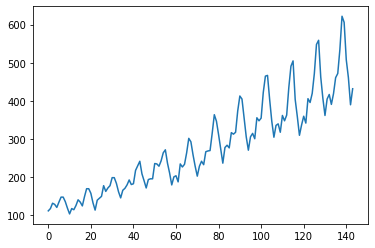

In [43]:
df.Passengers.plot()

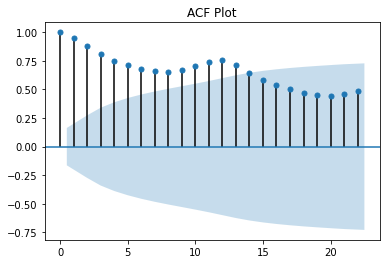

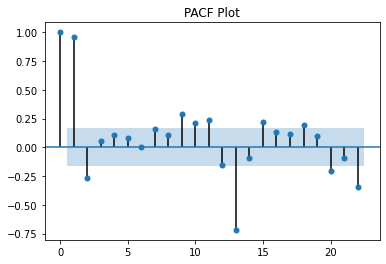

In [44]:
acf = plot_acf(df.Passengers, title = 'ACF Plot')
pacf = plot_pacf(df.Passengers, title = 'PACF Plot')

Observations:

*   ACF reduces to 0 slowly after first few 'q' lags
*   PACF reduces to 0 immediately after p = 1 lag



Hence, we choose **[p,d,q] = [0,0,1] -> MA method**

In [58]:
pdq = (0,0,1)

In [69]:
model = ARIMA(df.Passengers, order = (0,0,1))

In [70]:
ma_model = model.fit()
ma_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 1627.7720
Dependent Variable: Passengers       Log-Likelihood:      -806.43  
Date:               2022-08-28 22:38 Scale:               1.0000   
No. Observations:   144              Method:              css-mle  
Df Model:           2                Sample:              0        
Df Residuals:       142                                   4        
Converged:          1.0000           S.D. of innovations: 64.849   
No. Iterations:     7.0000           HQIC:                1622.483 
AIC:                1618.8625                                      
-------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
const            280.6467  10.5788 26.5291 0.0000 259.9126 301.3808
ma.L1.Passengers   0.9642   0.0214 45.0583 0.0000   0.9223   1.0062
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
MA.1          -1.0371             0.0000           1.0371             0.5000
===================================================================

"""

In [71]:
ma_model.pvalues

const               4.474615e-155
ma.L1.Passengers     0.000000e+00
dtype: float64

Since, p-value < 0.05, Therefore MA 1 (Lag q = 1 of ACF) is significant